<h1> Linear Regrassion with Tensorflow </h1>

Importing modules

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Lets generate some data for linear ragrassion

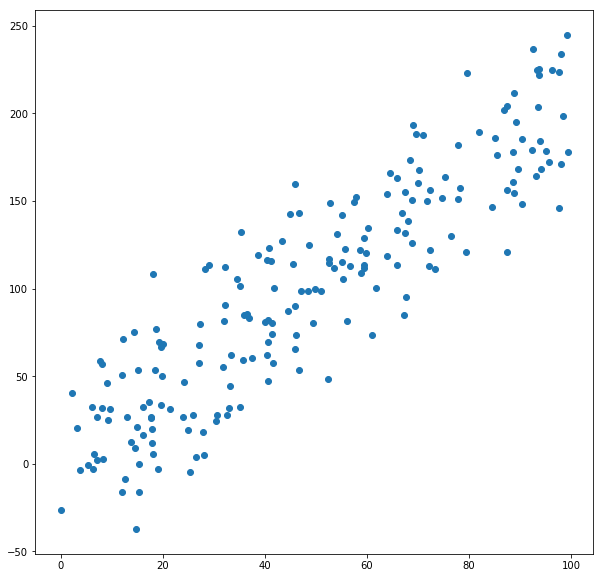

In [2]:
train_X = np.array([])
train_Y = np.array([])


sample_size = 200
for i in range(sample_size):
    x = np.random.rand(1) * 100.0
    y = np.random.normal(2 * x + 1, 30.0)
    train_X = np.concatenate((train_X, x))
    train_Y = np.concatenate((train_Y, y))

plt.figure(figsize=(10,10))
plt.scatter(train_X, train_Y)
plt.show()


value_X = np.arange(0, 100, .01)

In [3]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [4]:
A = tf.Variable(0.0)
B = tf.Variable(0.0)

pred = tf.add(tf.multiply(X, A), B)
cost = tf.reduce_sum(tf.pow(pred - Y, 2))/(2 * sample_size)

optimize = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

epoch 0:


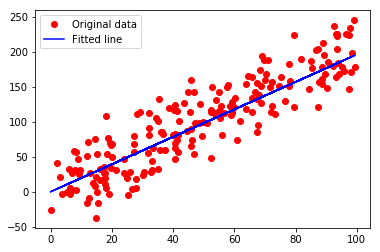

The cost now is 0.13879422843456268
epoch 100:


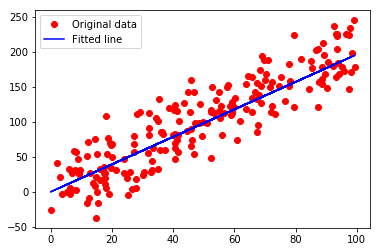

The cost now is 0.13985101878643036
epoch 200:


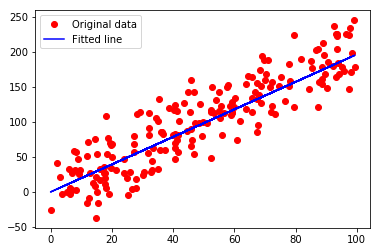

The cost now is 0.14067363739013672
epoch 300:


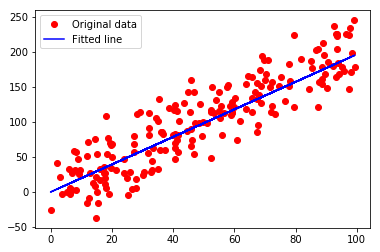

The cost now is 0.14131420850753784
epoch 400:


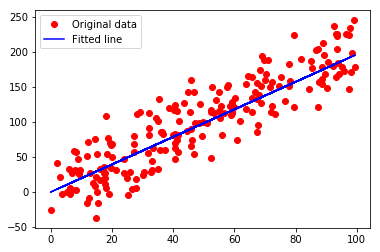

The cost now is 0.1418122500181198
The Final cost is 0.1421951949596405


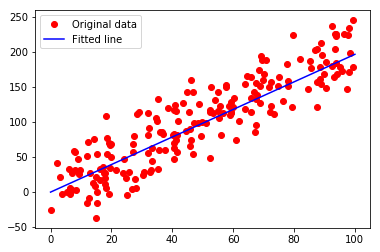

In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_epoch = 500
    for epoch in range(num_epoch):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimize, feed_dict={X: x, Y: y})
        if epoch % 100 == 0:
            print("epoch {}:".format(epoch))
            plt.plot(train_X, train_Y, 'ro', label='Original data')
            plt.plot(train_X, sess.run(A) * train_X + sess.run(B), 'b', label='Fitted line')
            plt.legend()
            plt.show()
            print("The cost now is {}".format(sess.run(cost, feed_dict={X: x,Y: y})))
    print("The Final cost is {}".format(sess.run(cost, feed_dict={X: x,Y: y})))
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(value_X, sess.run(A) * value_X + sess.run(B), 'b', label='Fitted line')
    plt.legend()
    plt.show()